In [4]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import functions,loading,replay_run

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig
import seaborn as sns
import nelpy as nel

In [5]:
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

## Run all sessions

In [222]:
importlib.reload(replay_run) # make sure to run most recent ver

df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df[df.basepath.str.contains('GrosmarkAD')]
 
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay_with_UID'
replay_run.main(df,save_path,parallel=True)

Z:\Data\GrosmarkAD\Achilles\Achilles_10252013


## Load all data

In [6]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    # calc and add ripple participation
    st = results['sta_placecells']
    bst = results['bst_placecells']
    particip_mat = functions.get_participation(st.data,bst.support.starts,bst.support.stops)
    results['df']['pop_partic'] = particip_mat.mean(axis=0)
    # add behavioral decoding quality
    results['df']['decoding_r2'] = np.float(results['decoding_r2'])
    results['df']['decoding_r2_pval'] = np.float(results['decoding_r2_pval'])
    results['df']['decoding_median_error'] = np.float(results['decoding_median_error'])
    results['df']['total_units'] = np.float(results['total_units'])

    df = df.append(results['df'],ignore_index=True)

C:\Users\Cornell\AppData\Local\Temp/ipykernel_23812/3889427403.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Cornell\AppData\Local\Temp/ipykernel_23812/3889427403.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\Cornell\AppData\Local\Temp/ipykernel_23812/3889427403.py:17: DeprecationWarning: `np.float` is a deprec

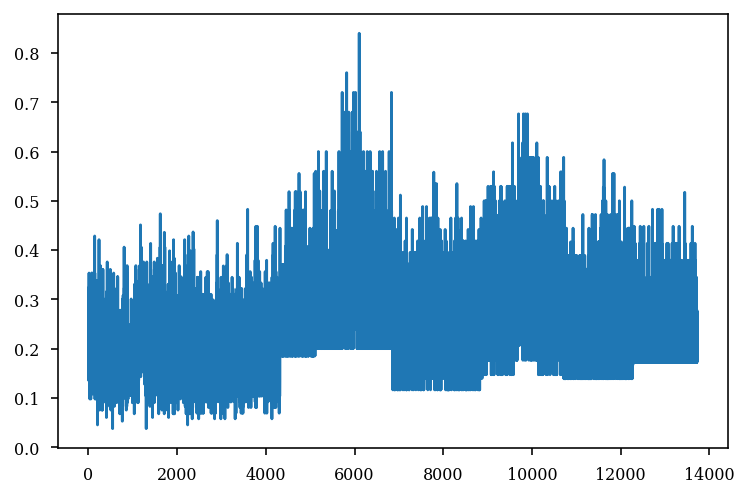

In [7]:
df

## Inspect decoding quality

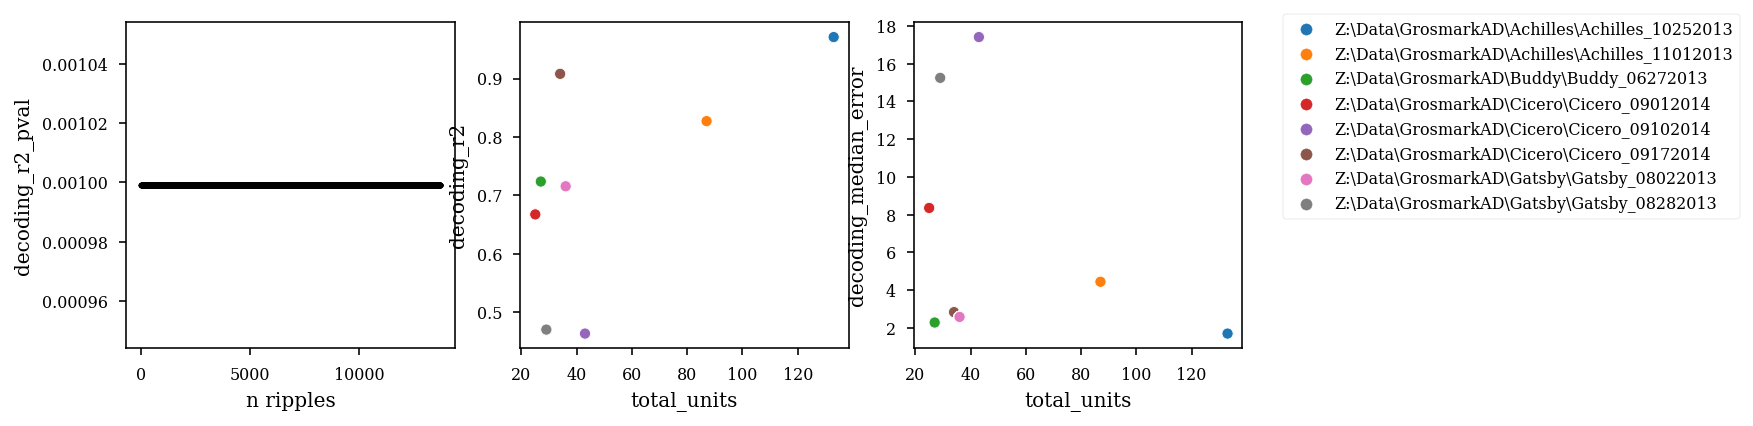

In [219]:
fig,axs = plt.subplots(1,3,figsize=(10,3))
axs[0].plot(df.decoding_r2_pval,'.k')
axs[0].set_ylabel('decoding_r2_pval')
axs[0].set_xlabel('n ripples')

sns.scatterplot(x="total_units", y="decoding_r2",
                hue="basepath",
                data=df, ax=axs[1],legend=False)

sns.scatterplot(x="total_units", y="decoding_median_error",
                hue="basepath",
                data=df, ax=axs[2])
axs[2].legend(bbox_to_anchor=(1.1, 1.05))


In [11]:
sum(df['score_pval_col_cycle'] < 0.05)/df.shape[0]

0.1165112212183037

In [9]:
print('n ripples',df.shape[0])
print('pass by col swap',sum(df['score_pval_col_cycle'] < 0.01))

print(df[df['score_pval_col_cycle'] < 0.01].basepath.value_counts())
print('')
print('pass by time swap',sum(df['score_pval_time_swap'] < 0.01))
print(df[df['score_pval_time_swap'] < 0.01].basepath.value_counts())
print('')
print('pass by time swap & col swap',sum((df['score_pval_time_swap'] < 0.01) & (df['score_pval_col_cycle'] < 0.01)))
print(df[(df['score_pval_time_swap'] < 0.01) & (df['score_pval_col_cycle'] < 0.01)].basepath.value_counts())
# df[(df['score_pval_time_swap'] < 0.01) & (df['score_pval_col_cycle'] < 0.01)].basepath.value_counts().plot(kind='barh')

n ripples 13724
pass by col swap 579
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    205
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    136
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014         62
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014         57
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014         45
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013         31
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013           22
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013         21
Name: basepath, dtype: int64

pass by time swap 266
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    95
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    51
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014        25
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013        25
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014        24
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014        22
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013        15
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013           9
Name: basepath, dtype: int64

pass by time swap & col swap 84
Z:\Data\G

## Show some replay and non replay examples

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


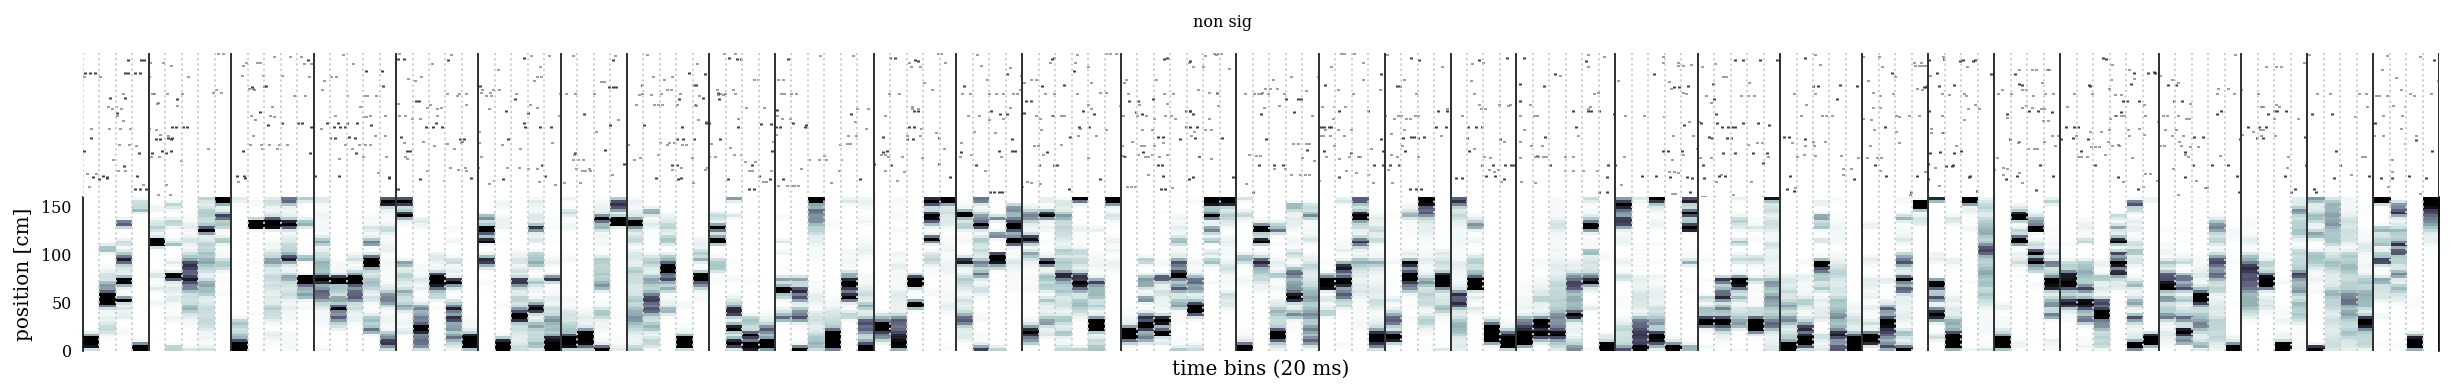

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


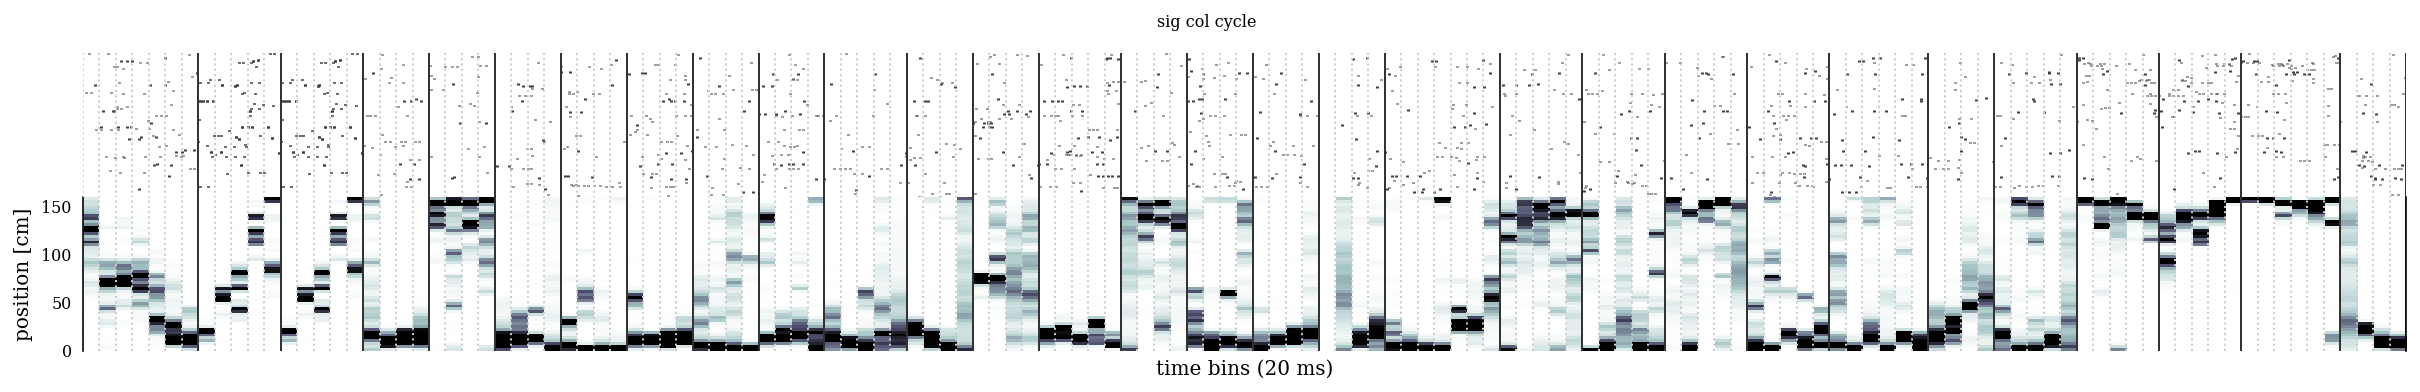

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:1590: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


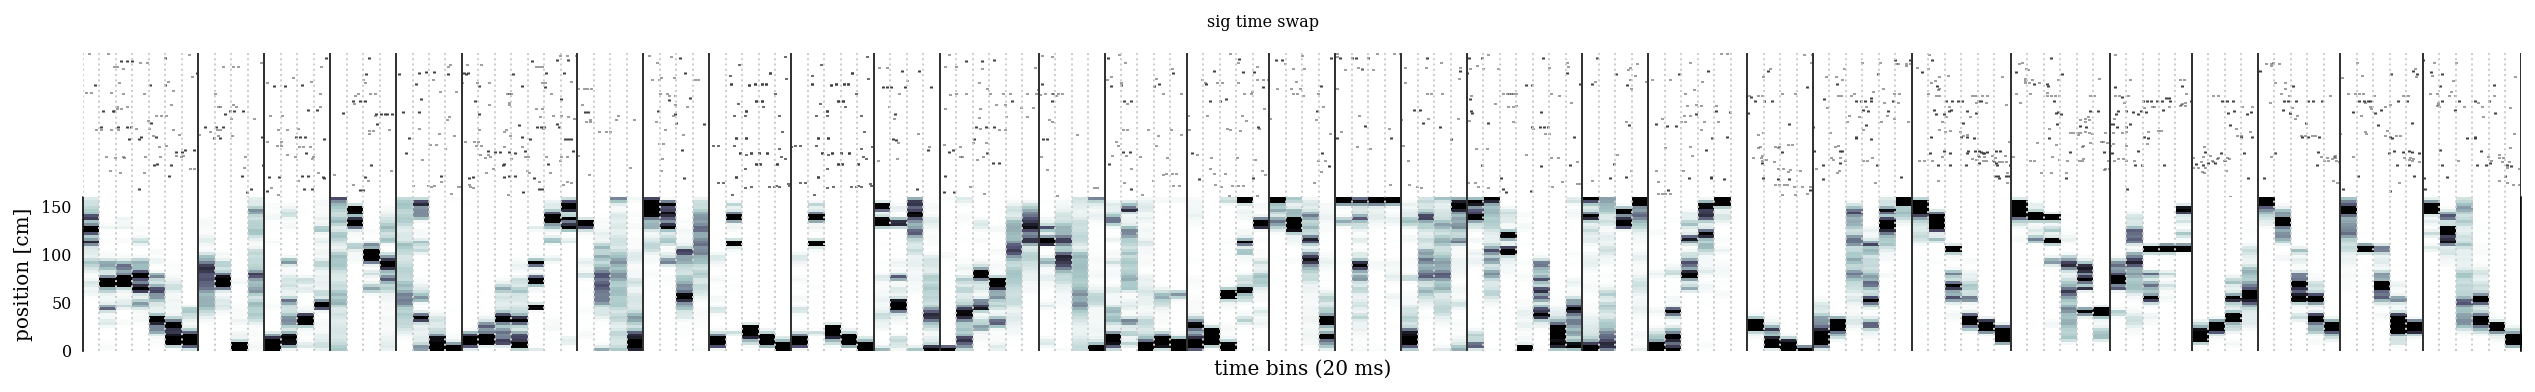

In [17]:
import importlib
importlib.reload(replay_fig)

session = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay\Z__Data_GrosmarkAD_Achilles_Achilles_10252013.pkl'

with open(session, 'rb') as f:
    results = pickle.load(f)


idx = np.where(df['score_pval_col_cycle'] > 0.01)[0][0:30]
ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="non sig")

idx = np.where(df['score_pval_col_cycle'] < 0.01)[0][0:30]
ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="sig col cycle")

idx = np.where(df['score_pval_time_swap'] < 0.01)[0][0:30]
ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str="sig time swap")

## Demonstrate that sig replay events benifit from recruiting units with low ripple participation probability

In [55]:
session = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay\Z__Data_GrosmarkAD_Achilles_Achilles_10252013.pkl'

with open(session, 'rb') as f:
    results = pickle.load(f)

ripple_epochs = nel.EpochArray([np.array([results['df'].start,results['df'].stop]).T])

epoch_df = loading.load_epoch(results['df'].basepath.unique()[0])
behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,
                                                epoch_df.stopTime]).T])

# states_dict = loading.load_SleepState_states(results['df'].basepath.unique()[0])
# nrem_epochs = nel.EpochArray(states_dict['NREMstate'])
# wake_epochs = nel.EpochArray(states_dict['WAKEstate'])

st = results['sta_placecells']
bst = results['bst_placecells']
# particip_mat = functions.get_participation(st.data,bst.support.starts,bst.support.stops)
# pop_partic = particip_mat.mean(axis=0)
# unit_partic = particip_mat.mean(axis=1)

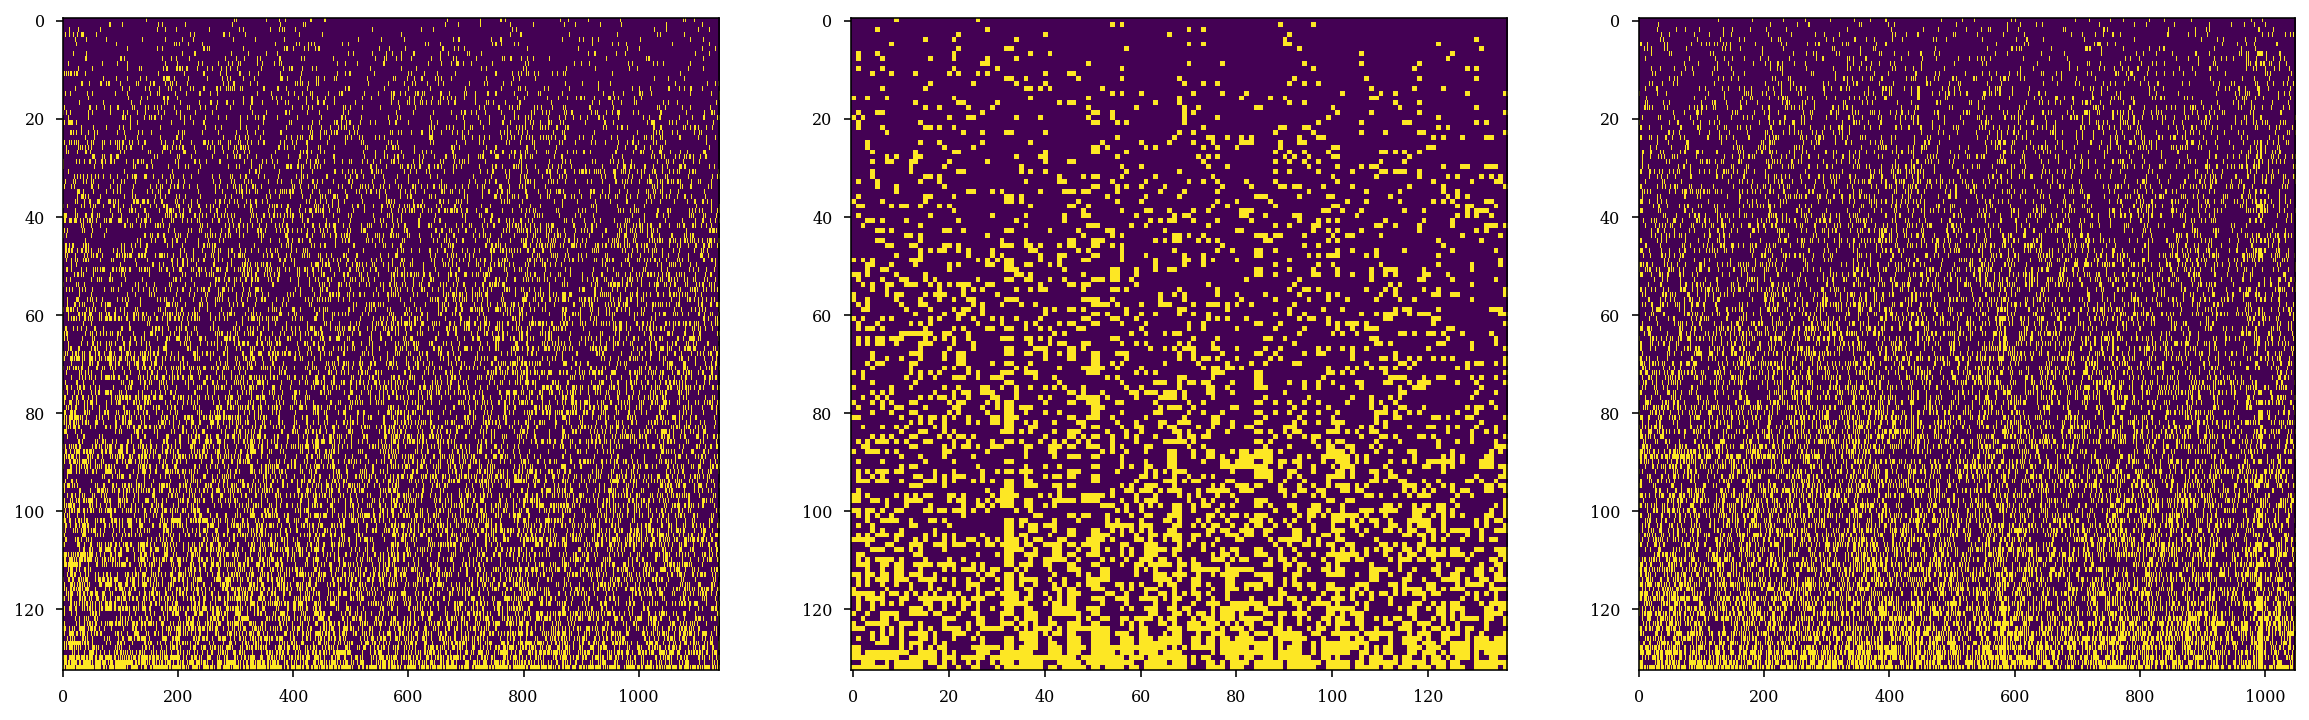

In [64]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

fig,axs = plt.subplots(1,3,figsize=(20,6))
idx = np.argsort(unit_partic)
axs[0].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')


starts = ripple_epochs[behavioral_epochs[1]].starts
stops = ripple_epochs[behavioral_epochs[1]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

idx = np.argsort(unit_partic)
axs[1].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')


starts = ripple_epochs[behavioral_epochs[2]].starts
stops = ripple_epochs[behavioral_epochs[2]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

idx = np.argsort(unit_partic)
axs[2].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')

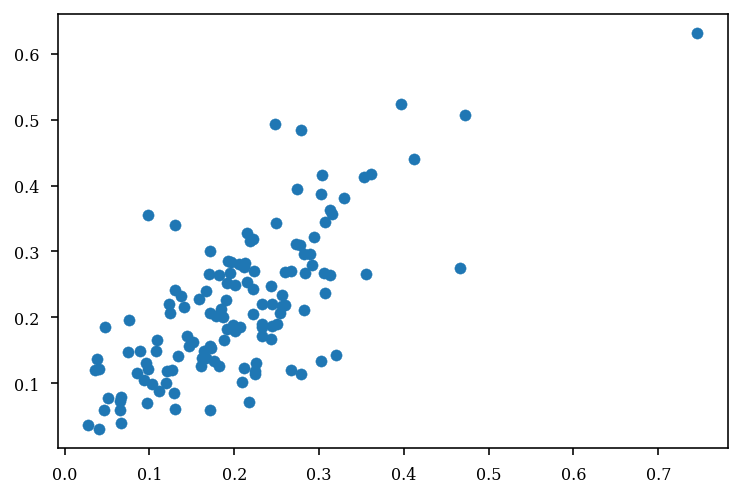

In [91]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
# pop_partic = particip_mat.mean(axis=0)
unit_partic_pre = particip_mat_pre.mean(axis=1)

starts = ripple_epochs[behavioral_epochs[2]].starts
stops = ripple_epochs[behavioral_epochs[2]].stops
particip_mat_post = functions.get_participation(st.data,starts,stops)
# pop_partic = particip_mat.mean(axis=0)
unit_partic_post = particip_mat_post.mean(axis=1)

plt.scatter(unit_partic_pre,unit_partic_post)

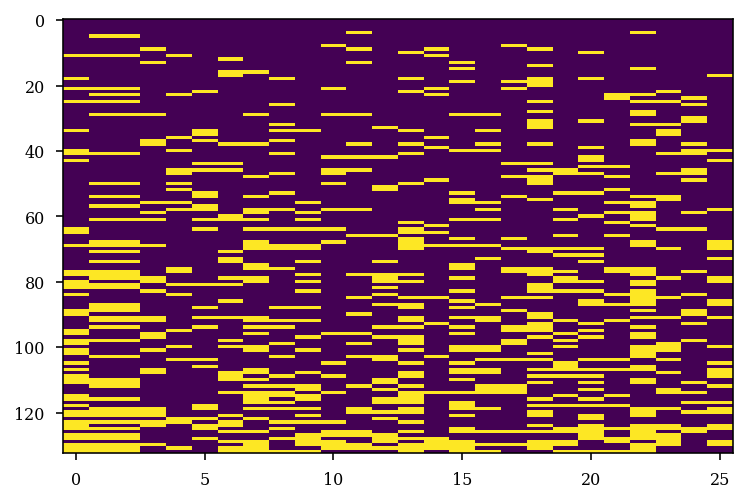

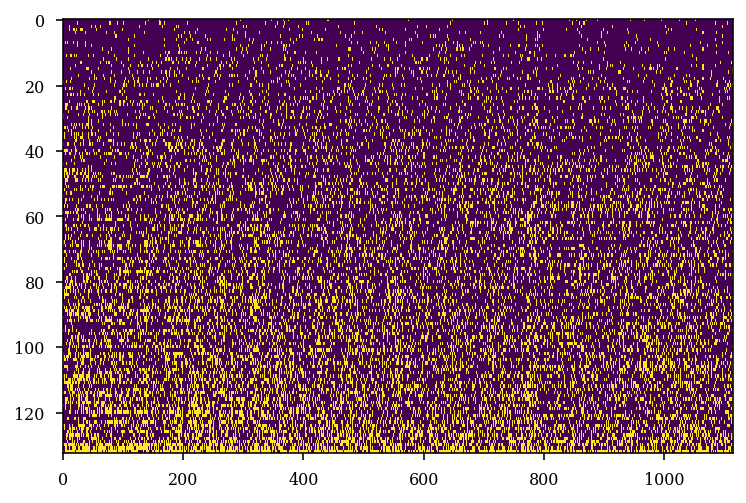

In [82]:
# plt.hist(unit_partic_pre,50)
# plt.show()

idx = results['df'].peaks.between(behavioral_epochs[0].start,behavioral_epochs[0].stop)

sort_idx = np.argsort(unit_partic_pre)

plt.imshow(particip_mat_pre[:,results['df'][idx].score_pval_col_cycle < 0.01][sort_idx],aspect='auto',interpolation='nearest')
plt.figure()
plt.imshow(particip_mat_pre[:,results['df'][idx].score_pval_col_cycle > 0.01][sort_idx],aspect='auto',interpolation='nearest')


In [108]:
sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle < 0.01]]).T])

non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle > 0.01]]).T])

starts = sig_replay_epochs[behavioral_epochs[0]].starts
stops = sig_replay_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_pre_sig_replay = particip_mat.mean(axis=1)

starts = sig_replay_epochs[behavioral_epochs[1]].starts
stops = sig_replay_epochs[behavioral_epochs[1]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_task_sig_replay = particip_mat.mean(axis=1)

starts = sig_replay_epochs[behavioral_epochs[2]].starts
stops = sig_replay_epochs[behavioral_epochs[2]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_post_sig_replay = particip_mat.mean(axis=1)

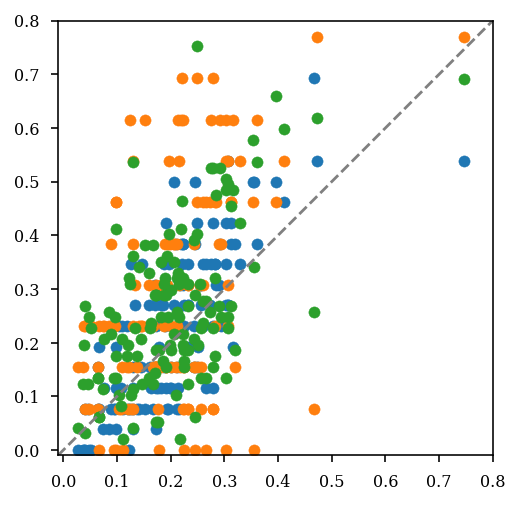

In [107]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
unit_partic_pre = particip_mat_pre.mean(axis=1)

plt.scatter(unit_partic_pre,unit_partic_pre_sig_replay)
plt.scatter(unit_partic_pre,unit_partic_task_sig_replay)
plt.scatter(unit_partic_pre,unit_partic_post_sig_replay)
plt.xlim(-.01,.8)
plt.ylim(-.01,.8)
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes,color='grey', ls='--')
ax.set_aspect('equal', adjustable='box')


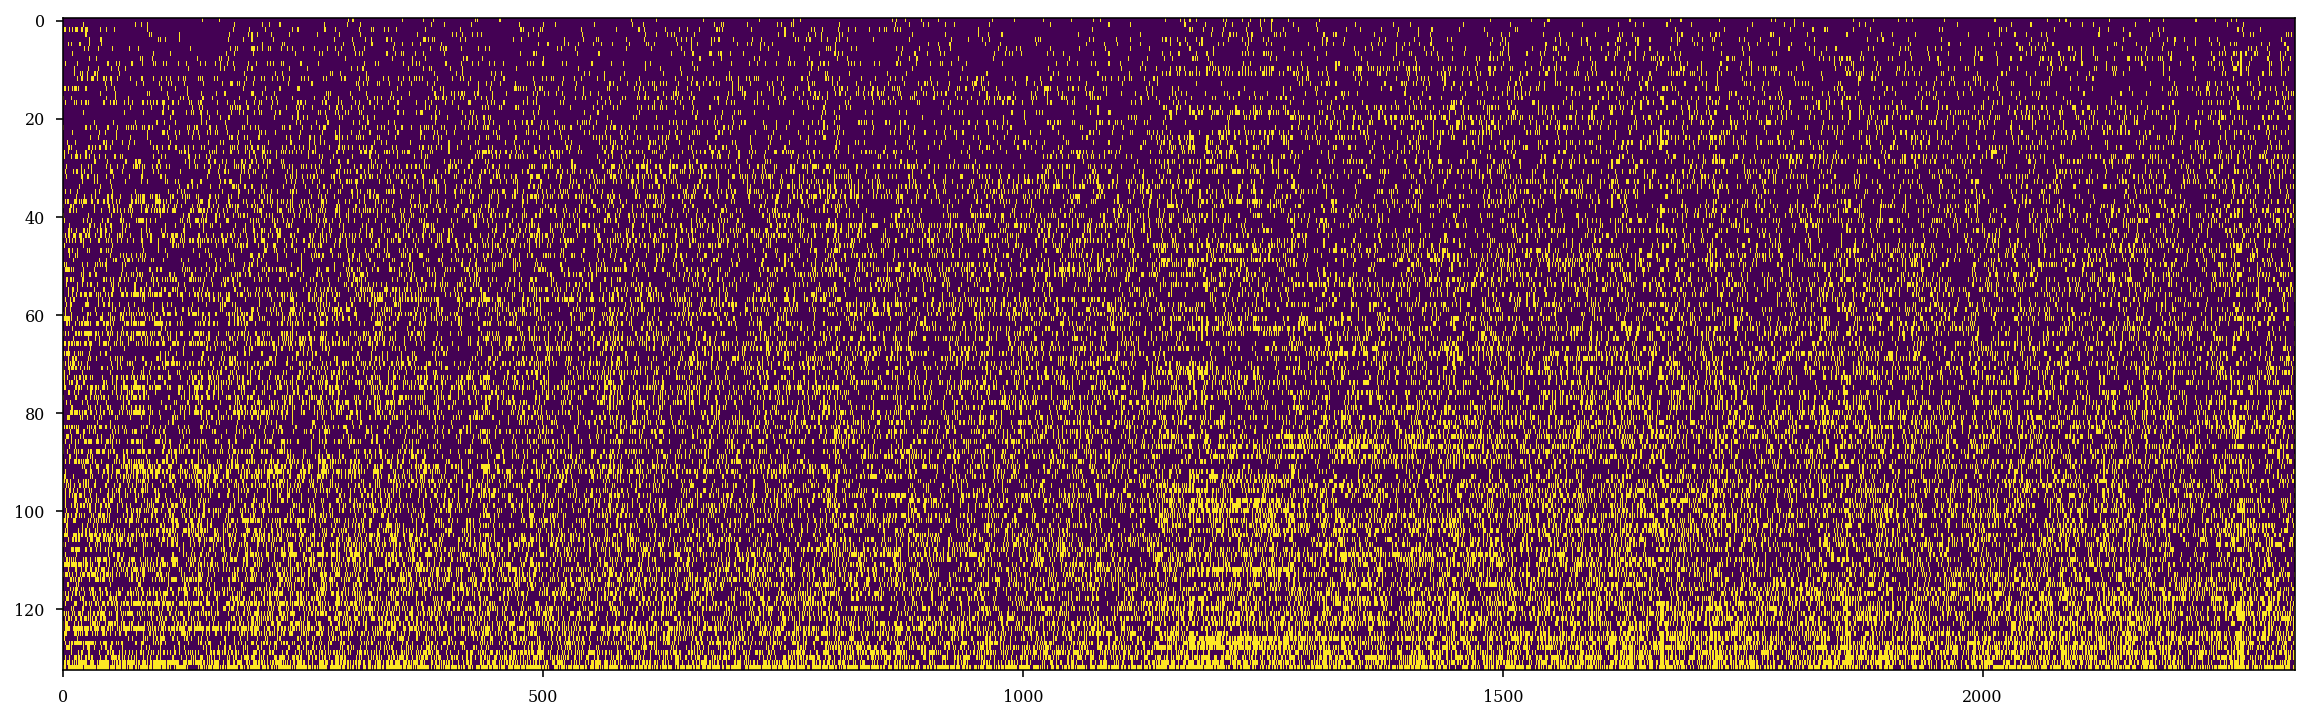

In [19]:
plt.figure(figsize=(20,6))
idx = np.argsort(unit_partic)
plt.imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


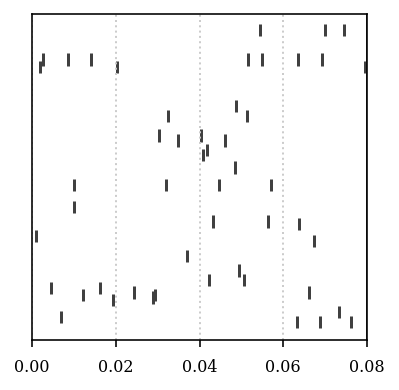

In [20]:
import nelpy.plotting as npl

plt.figure(figsize=(3,3))

# plt.eventplot(results['sta_placecells'].data)
# plt.show()
bst = results['bst_placecells']
st = results['sta_placecells']
tc_placecells = results['tc']

idx = 0
bst = bst[idx]

no = tc_placecells.get_peak_firing_order_ids()
st.reorder_units_by_ids(no, inplace=True)

st_cut = st[bst.support]
st_cut._support = bst.support # hacky fix so that we can plot events out of order
st_cut = nel.utils.collapse_time(st_cut)

ax=plt.gca()
npl.rasterplot(st_cut, vertstack=True, ax=ax, lh=5)
ax.set_xlim(st_cut.support.time.squeeze())

bin_edges = np.linspace(st_cut.support.time[0,0],
                        st_cut.support.time[0,1],
                        bst.n_bins+1)

ax.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
ax.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')

npl.utils.no_yticks(ax)
npl.utils.no_yticklabels(ax)

## Explore broad features of sig and non sig replay from different thresholds

<AxesSubplot:xlabel='pop_partic', ylabel='Probability'>

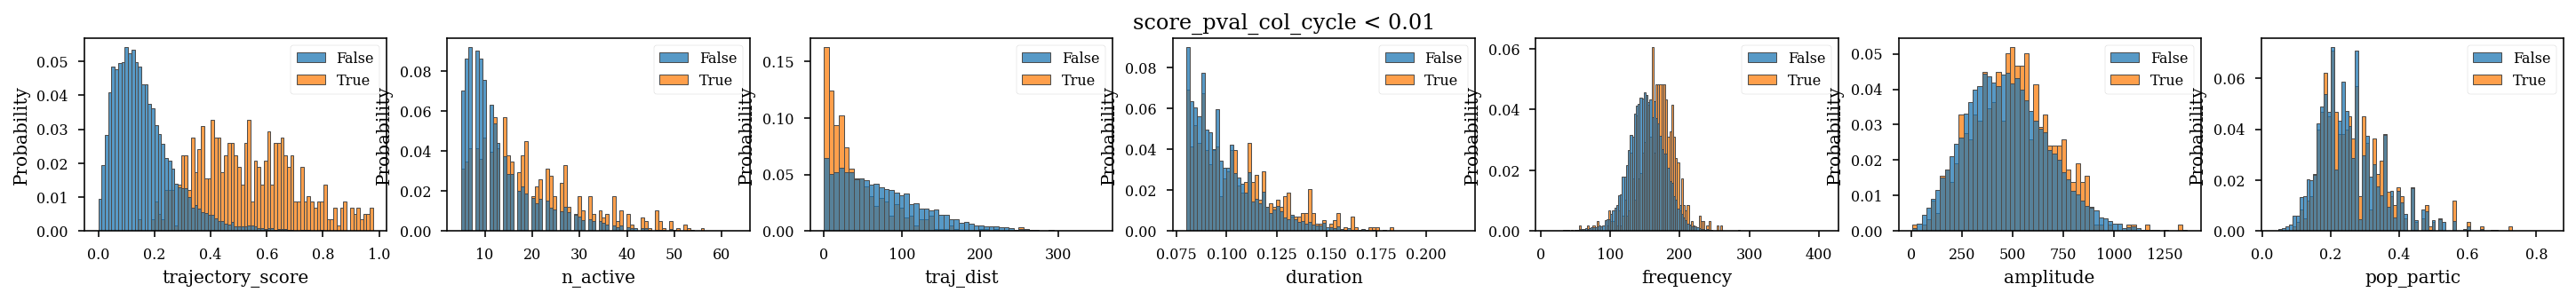

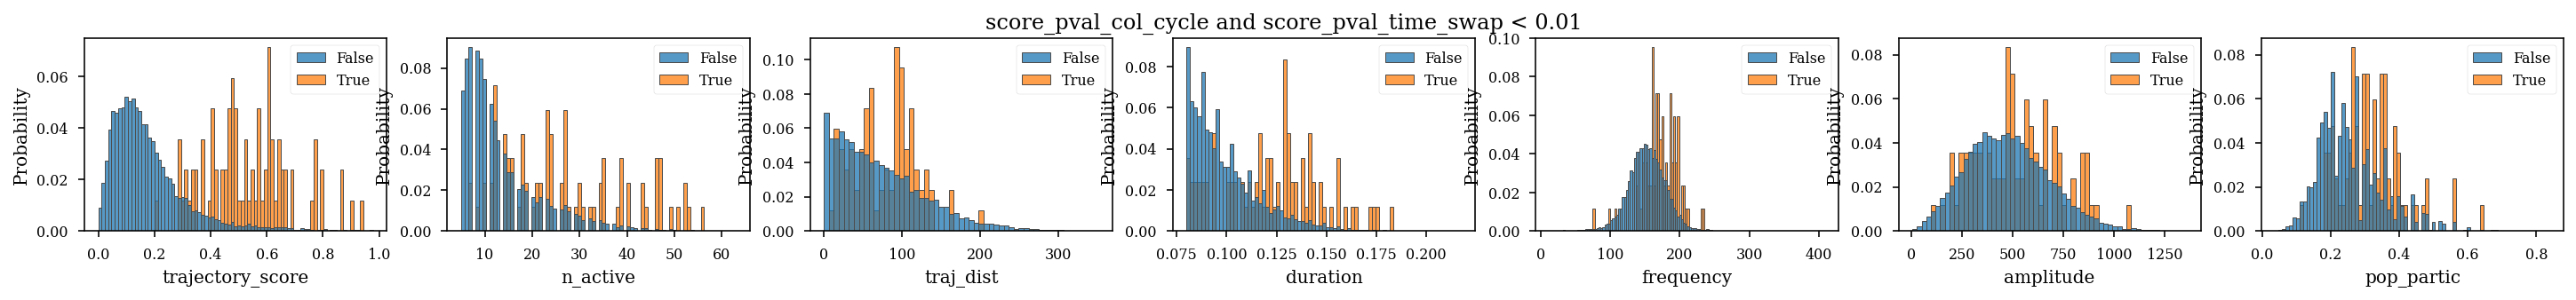

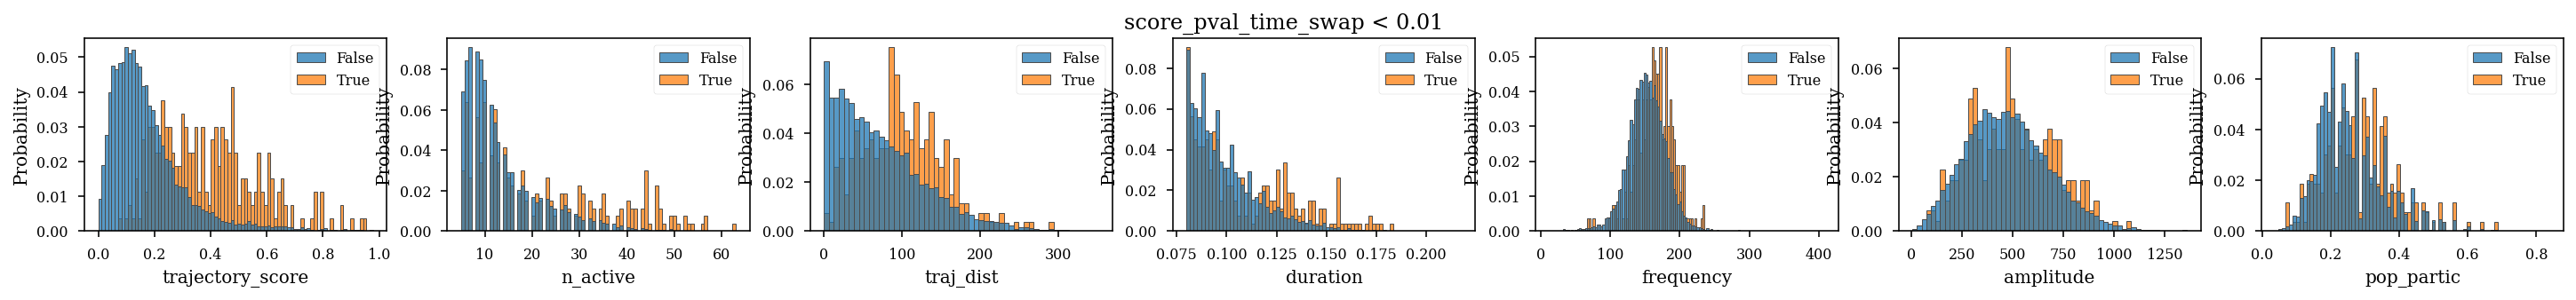

In [198]:
fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_col_cycle < 0.01', fontsize=12)
idx = df['score_pval_col_cycle'].values < 0.01
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_col_cycle and score_pval_time_swap < 0.01', fontsize=12)
idx = (df['score_pval_col_cycle'] < 0.01) & (df['score_pval_time_swap'] < 0.01)
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_time_swap < 0.01', fontsize=12)
idx = (df['score_pval_time_swap'].values < 0.01)
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

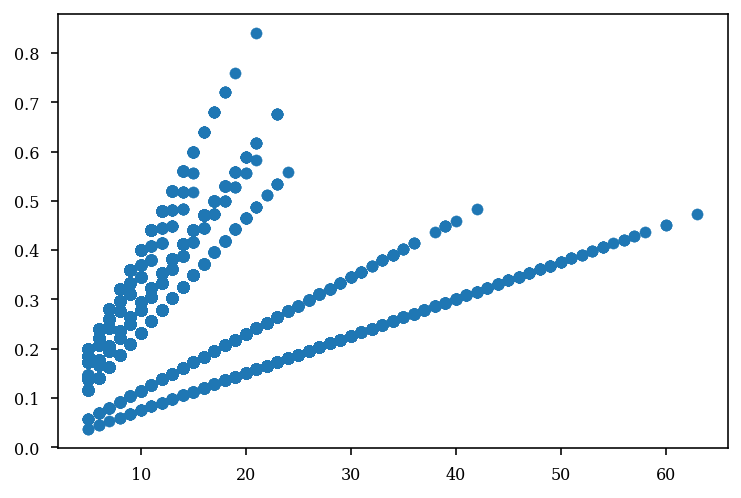

In [199]:
plt.scatter(df.n_active,df.pop_partic)

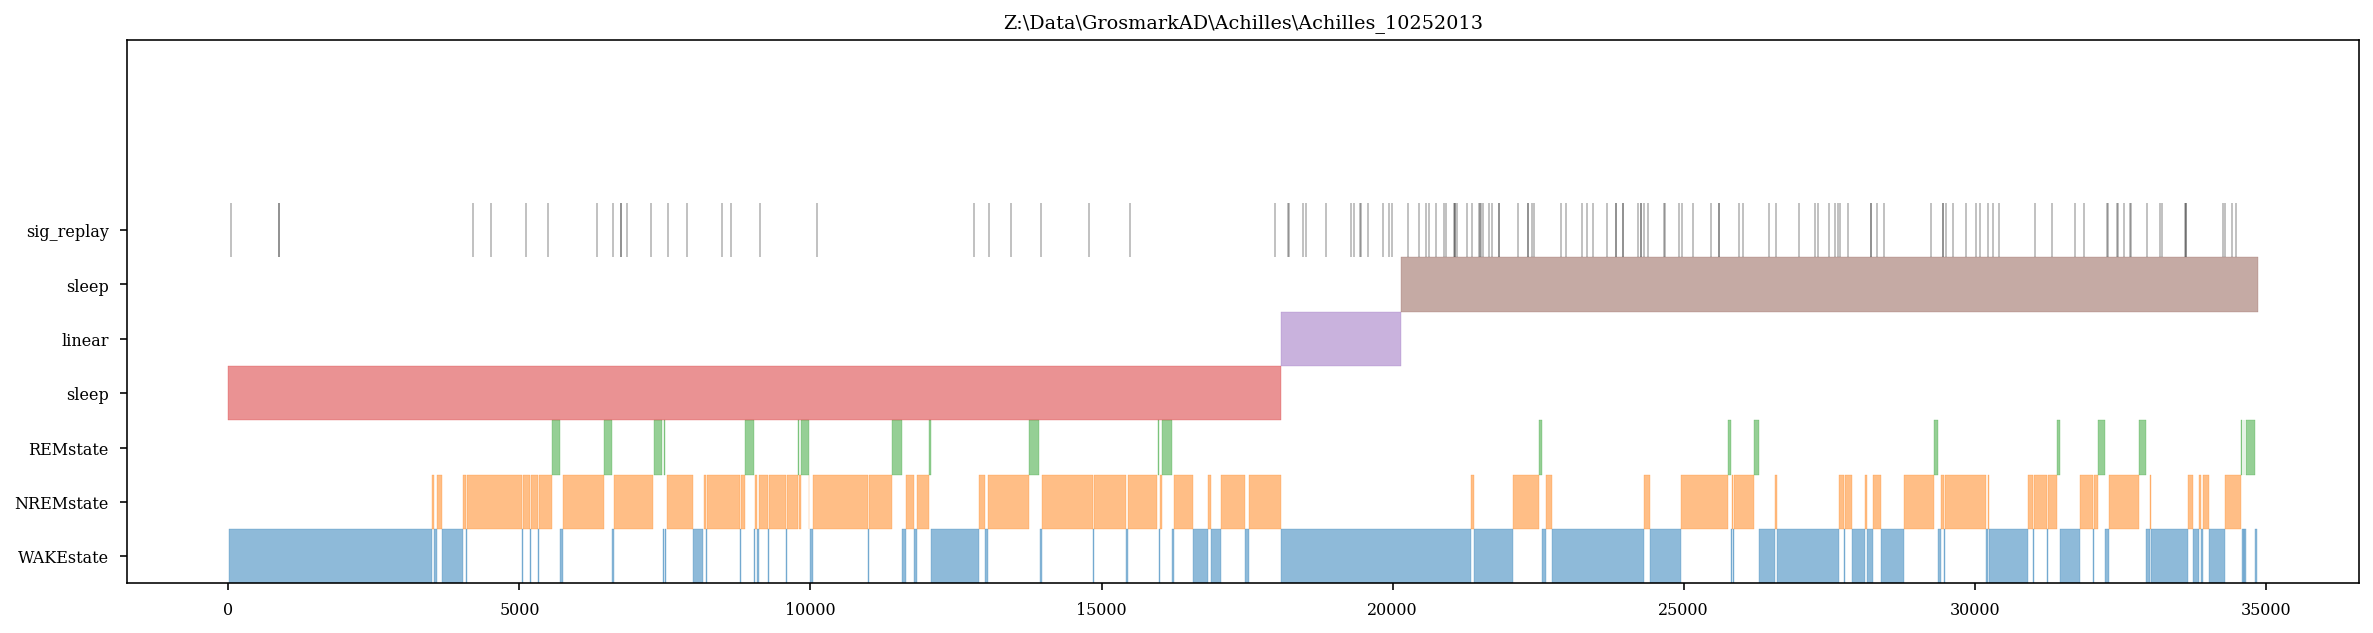

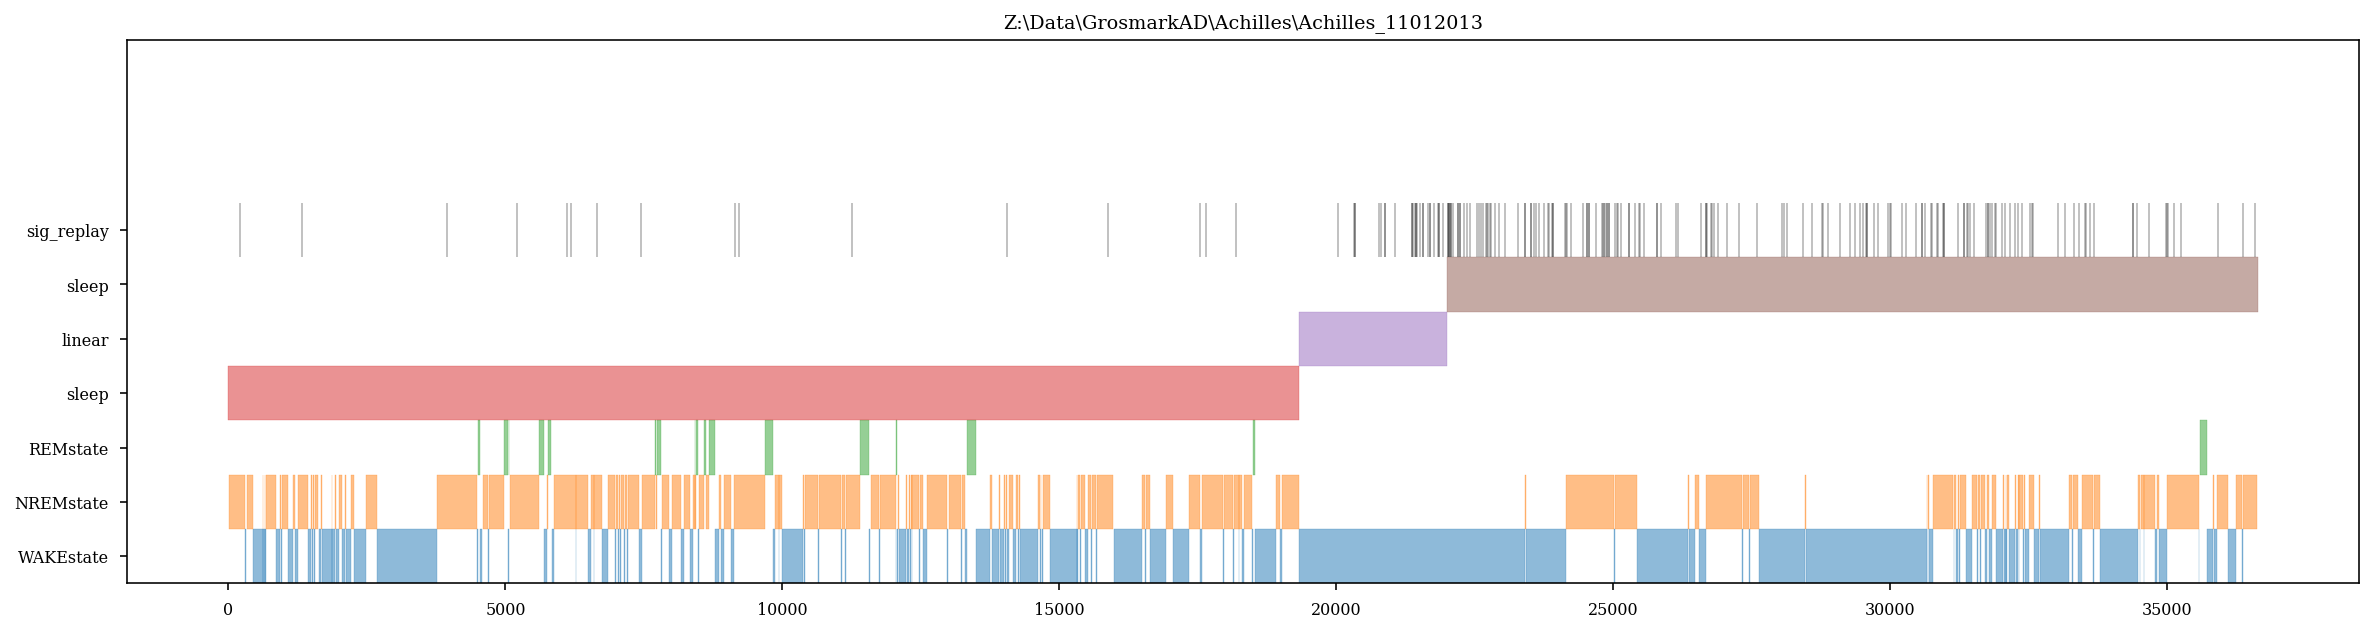

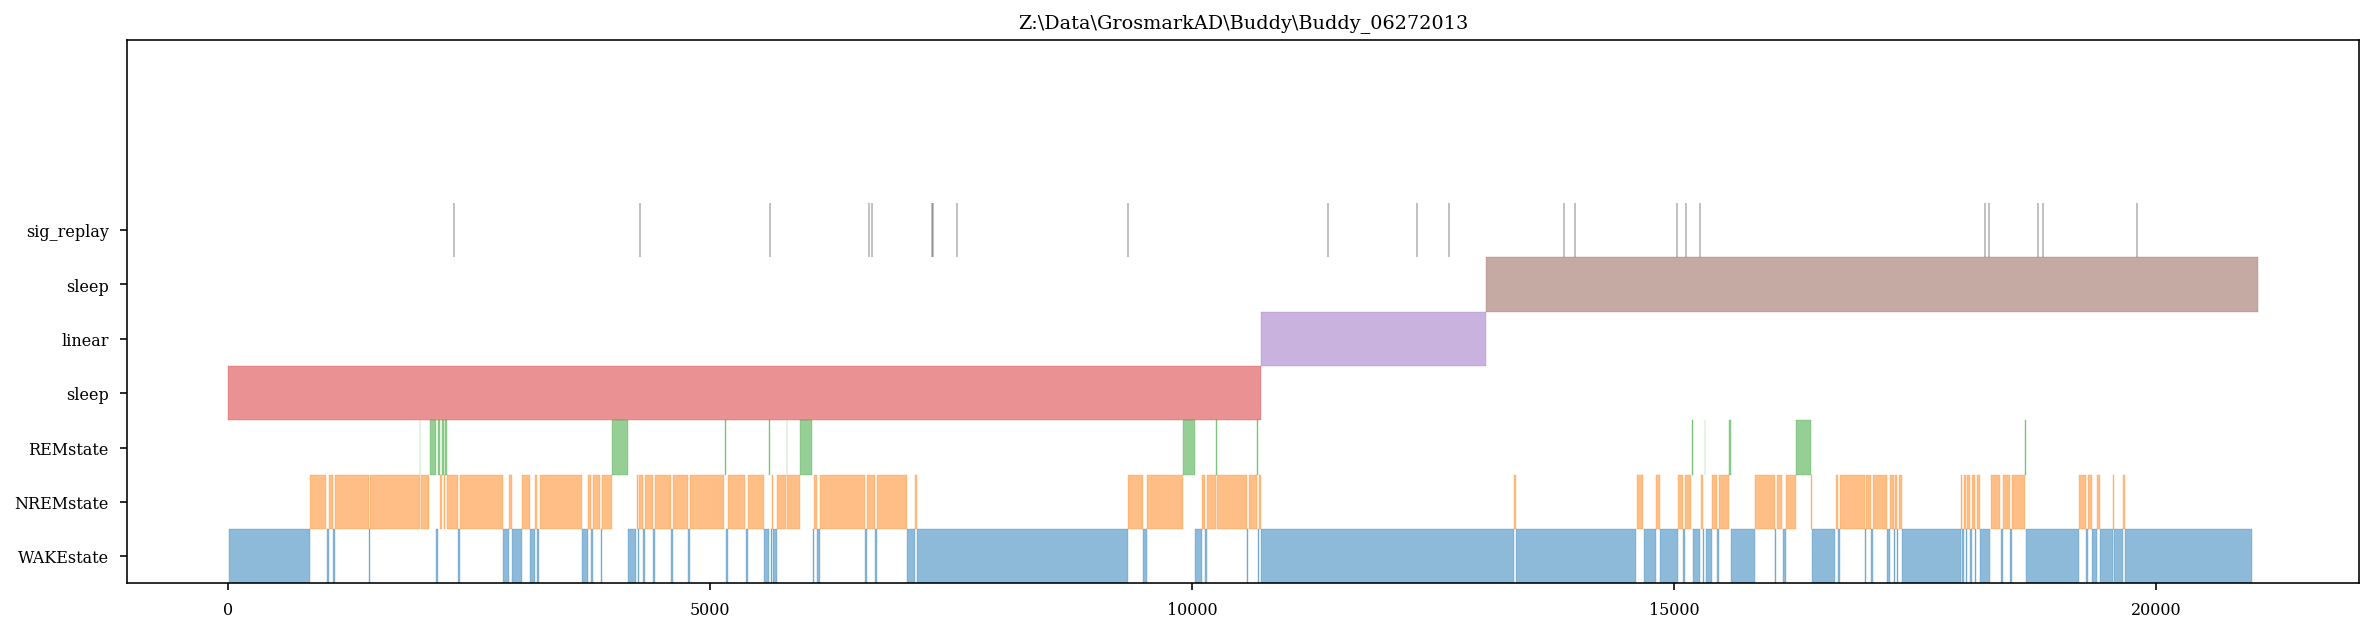

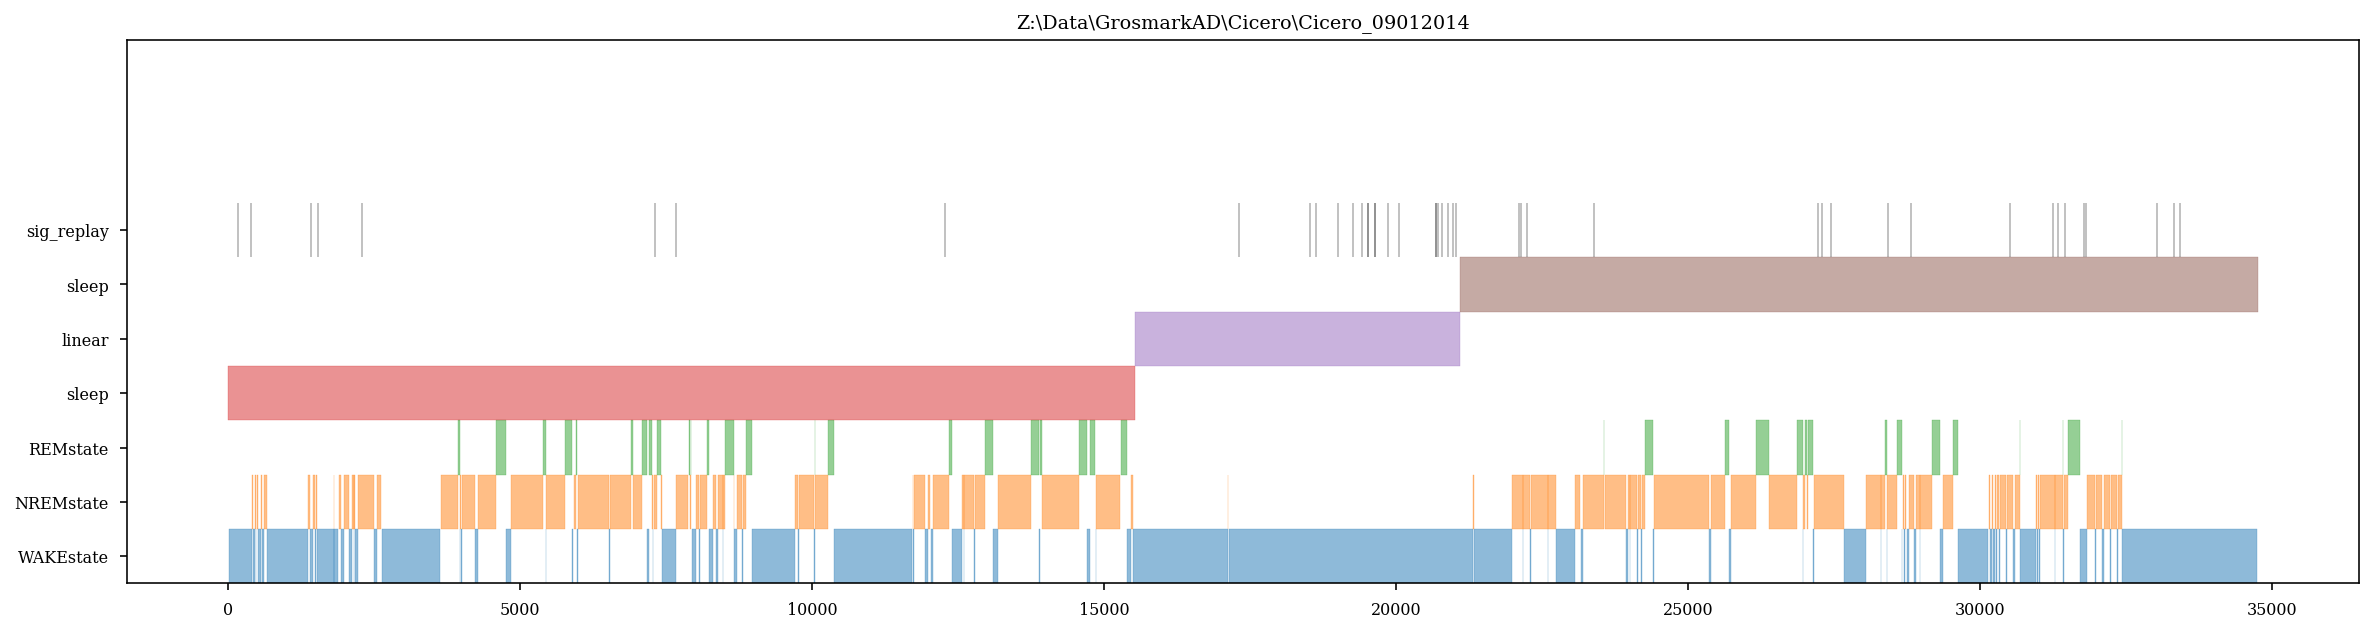

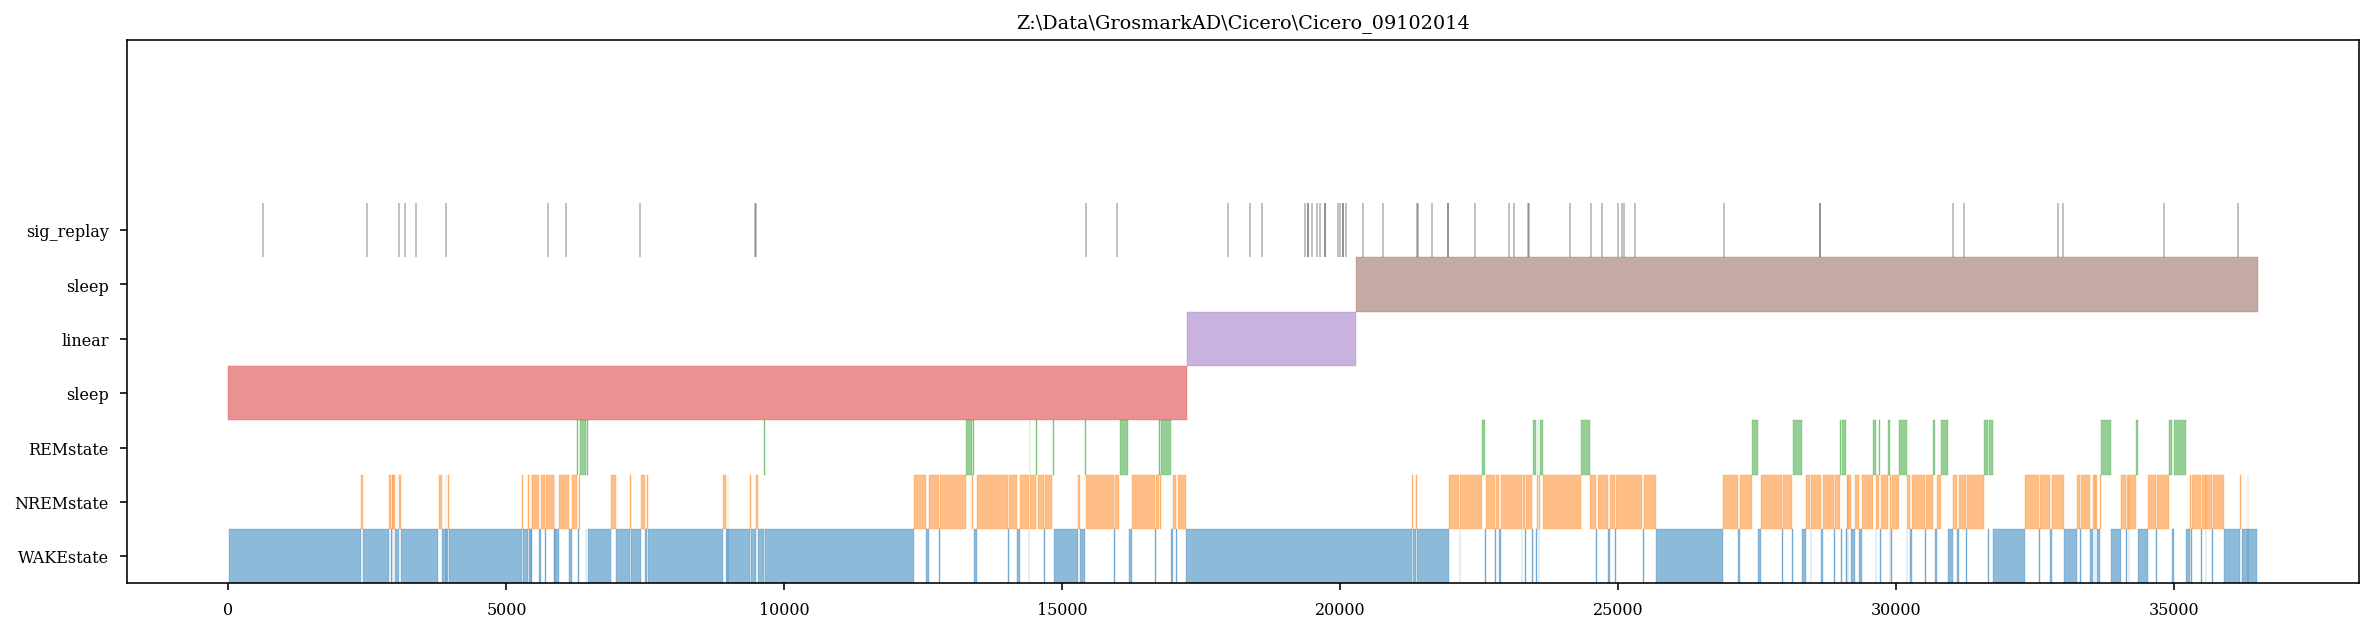

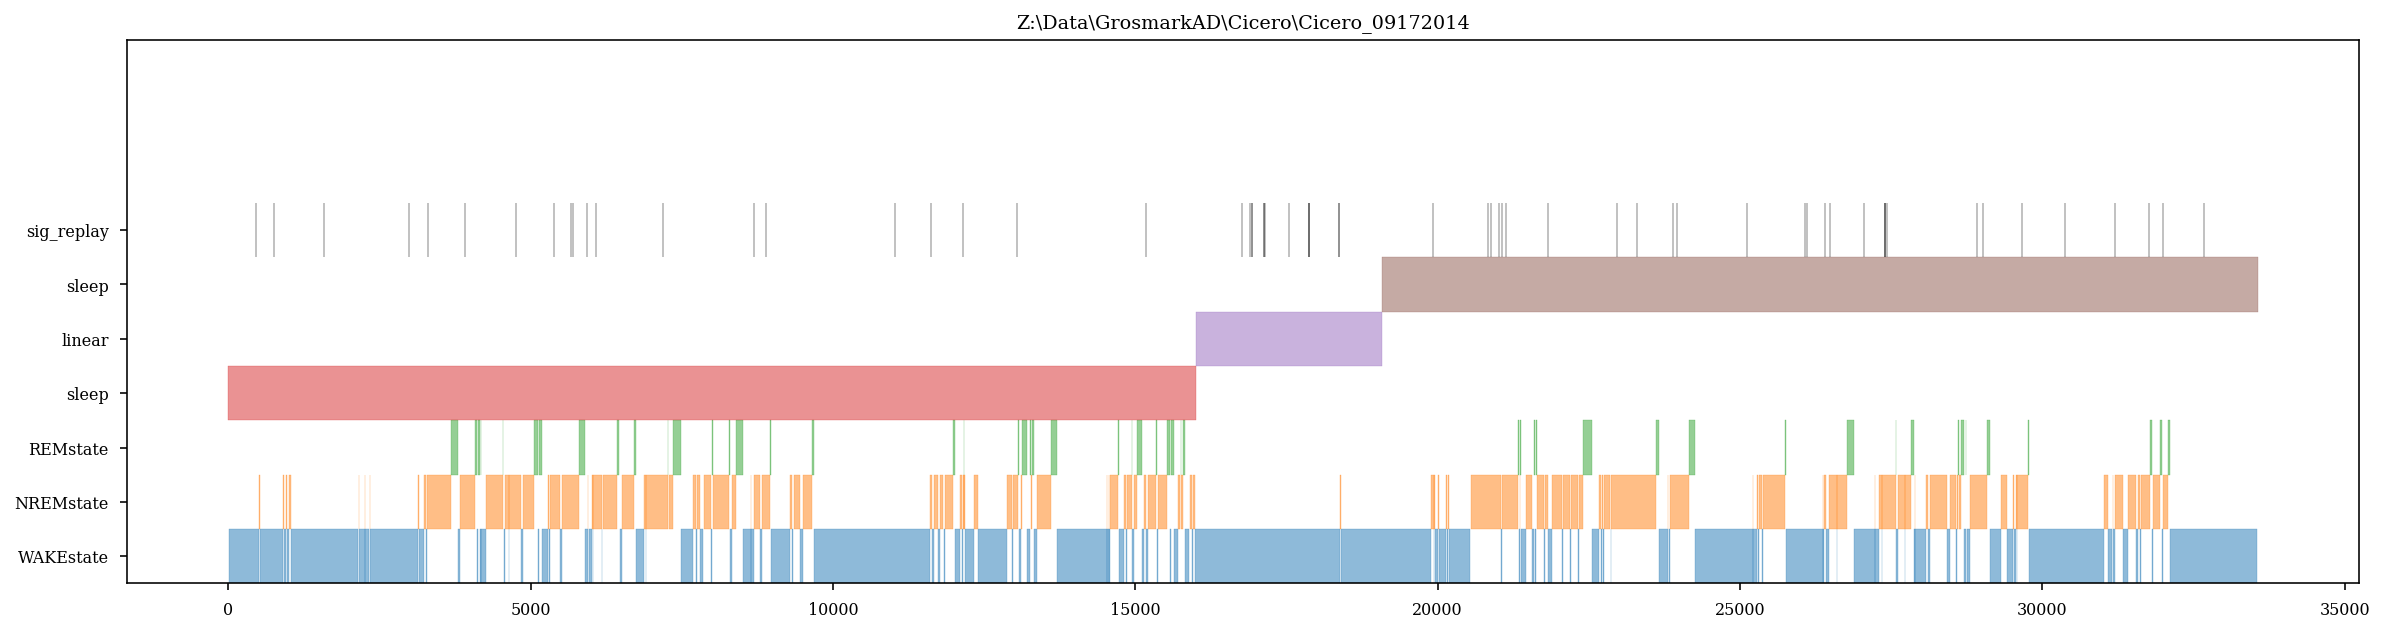

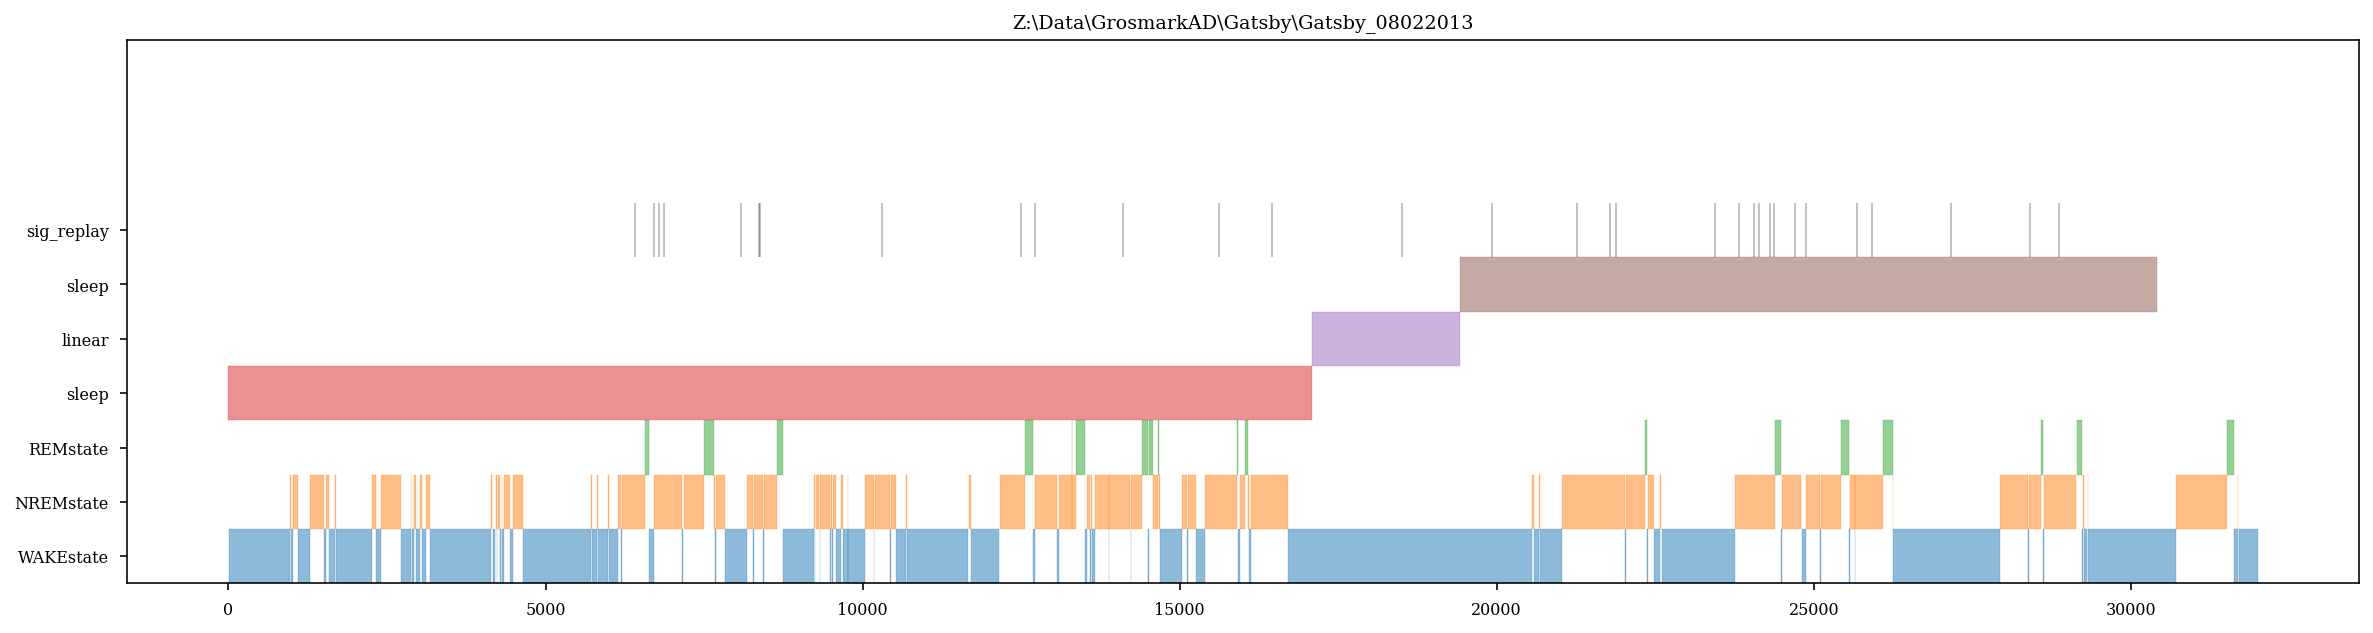

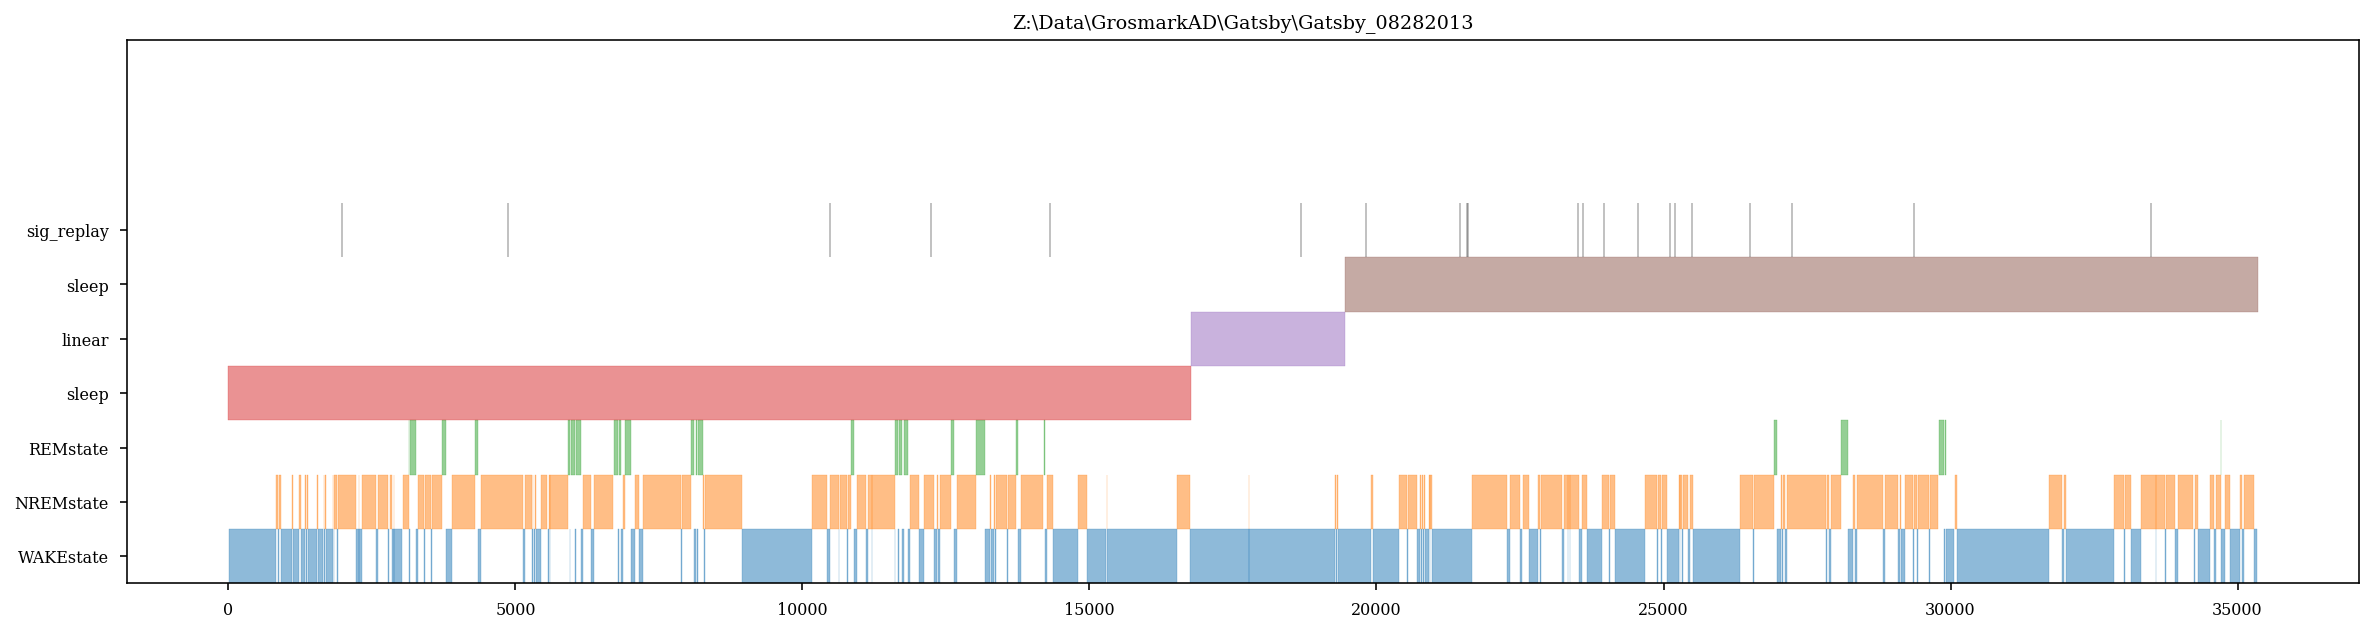

In [90]:
import matplotlib

def plot_sig_replay_over_epochs(results):

    plt.figure(figsize=(20,5))
    basepath = results['df'].basepath.unique()[0]

    states_dict = loading.load_SleepState_states(basepath)
    epoch_df = loading.load_epoch(basepath)

    cmap = matplotlib.cm.get_cmap('tab20')

    var_keys = ['WAKEstate','NREMstate','REMstate']

    y = np.arange(len(var_keys + list(epoch_df.environment))+2)*.1

    for i,key in enumerate(var_keys):
        for pair in states_dict[key]:
            plt.axvspan(pair[0], pair[1],y[i],y[i+1], alpha=0.5,color=cmap(i*.1))

    for ep in epoch_df.itertuples():
        i+=1
        plt.axvspan(ep.startTime, ep.stopTime,y[i],y[i+1], alpha=0.5,color=cmap(i*.1))


    temp_df = results['df'][(results['df']['score_pval_col_cycle'] < 0.01)]
    i+=1

    for ep in temp_df.itertuples():
        plt.axvspan(ep.start, ep.stop,y[i],y[i+1], alpha=1,color='k')

    # plt.grid() (results['df']['score_pval_time_swap'] < 0.05)
    # plt.plot(results['df'].peaks,(results['df']['score_pval_col_cycle'] < 0.01) ,'k',alpha=.5,label='sig. replay = 1')
    # plt.xlim(results['df'].peaks.min(),results['df'].peaks.max())
    # plt.legend()
    ax = plt.gca()
    ax.set_yticks(y[:-1]+.05)
    ax.set_yticklabels(var_keys + list(epoch_df.environment) + list(['sig_replay']))
    plt.title(basepath)  

sessions = glob.glob(save_path +os.sep+ '*.pkl')
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    plot_sig_replay_over_epochs(results)  
    

In [35]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]

In [79]:
# test = results['bst_placecells'][idx]
# # results['sta_placecells']
# test.bin_centers

any(results['df']['replay_type'] == np.nan)

False

In [4]:
sessions = glob.glob(save_path +os.sep+ '*.pkl')

with open(sessions[0], 'rb') as f:
    results = pickle.load(f)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


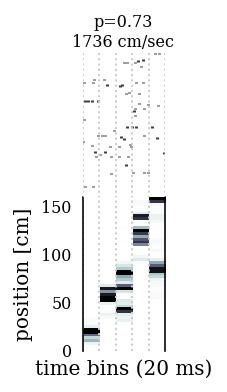

In [98]:
importlib.reload(replay_fig)

idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[2]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title) 

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


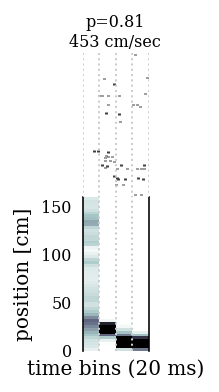

reverse


In [44]:
idxs = np.where((results['df']['replay_type'] == 'reverse') & (results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[1]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
# results['df'].replay_type

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


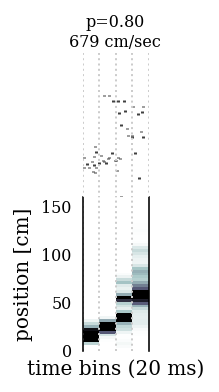

forward


In [45]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[31]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


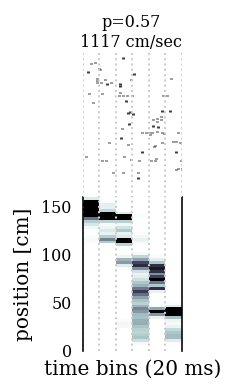

forward


In [46]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[29]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = (
        (results['df']['score_pval_col_cycle']<0.05) &
        (results['df']['score_pval_time_swap']<0.05)
        )
results['df'][idx]               

,start,stop,peaks,amplitude,duration,frequency,detectorName,ripple_channel,event_spk_thres,basepath,...,slope,intercept,score_pval_time_swap,score_pval_col_cycle,traj_dist,traj_speed,traj_step,replay_type,dist_rat_start,dist_rat_end
24,47.6952,47.8432,47.7912,851.758590,0.1480,161.080797,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.328841,276.010782,0.001999,0.009993,109.973046,916.442049,18.328841,NaN,NaN,NaN
227,862.1312,862.2456,862.1608,850.904118,0.1144,192.164774,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,34.716981,-3978.566038,0.019320,0.006662,138.867925,1735.849057,34.716981,NaN,NaN,NaN
228,862.1312,862.2456,862.1608,850.904118,0.1144,192.164774,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,34.716981,-4152.150943,0.013324,0.007328,138.867925,1735.849057,34.716981,NaN,NaN,NaN
261,960.9256,961.0640,960.9712,690.977610,0.1384,173.337576,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-10.954178,1570.875112,0.027981,0.035310,54.770889,547.708895,10.954178,NaN,NaN,NaN
539,2095.3560,2095.4424,2095.4232,378.692609,0.0864,176.284368,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-23.245283,6386.113208,0.041306,0.041972,69.735849,1162.264151,23.245283,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,33345.9768,33346.1384,33346.0552,686.269406,0.1616,161.658598,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,14.159928,-146645.283019,0.007995,0.016656,99.119497,707.996406,14.159928,NaN,NaN,NaN
10901,33636.1368,33636.2920,33636.2184,707.100262,0.1552,166.927743,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.652291,194103.935310,0.001999,0.003331,111.913747,932.614555,18.652291,NaN,NaN,NaN
10902,33636.1368,33636.2920,33636.2184,707.100262,0.1552,166.927743,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-18.652291,194234.501348,0.001999,0.001999,111.913747,932.614555,18.652291,NaN,NaN,NaN
11108,34270.2720,34270.4184,34270.2928,895.957985,0.1464,184.415552,bz_DetectSWR,76,1,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,...,-23.180593,244448.625337,0.000666,0.005996,139.083558,1159.029650,23.180593,NaN,NaN,NaN


In [200]:
import warnings
warnings.filterwarnings("ignore")

idxs = np.where((results['df']['score_pval_col_cycle']<0.05))[0]

for idx in idxs:   
    idx = int(idx)   
    if isinstance(idx, int):
        title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
    else:
        title = ""
    ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                            results['sta_placecells'],
                                            results['tc'],
                                            results['tc'],
                                            vmax=.1,
                                            title_str=title)           
    fig.savefig(os.path.join(fig_save_path,'replay_examples',str(idx)+'_.png'),dpi=300,bbox_inches='tight')
    plt.close(fig)

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import nelpy.plotting as npl
import nelpy as nel

def plot_all_PBEs(bst, spiketrainarray, tuningcurve, tc_placecells, idx=None, title_str=None,vmax=.1):
    if idx is not None:
        bst = bst[idx]
    st = spiketrainarray
    tc = tuningcurve
    tc_placecells = tc_placecells

    no = tc_placecells.get_peak_firing_order_ids()
    st.reorder_units_by_ids(no, inplace=True)

    st_cut = st[bst.support]
    st_cut._support = bst.support # hacky fix so that we can plot events out of order
    st_cut = nel.utils.collapse_time(st_cut)

    # decode neural activity
    posterior, bdries, mode_pth, mean_pth = nel.decoding.decode1D(bst=bst, ratemap=tc, xmax=120)
    
    width,height = functions.set_size('thesis', fraction=.25, subplots=(3, 1))

#     with npl.FigureManager(show=True, figsize=(0.2*bst.n_bins,4)) as (fig, ax):
    with npl.FigureManager(show=True, figsize=(width*bst.n_bins*.1,height)) as (fig, ax):

        npl.utils.skip_if_no_output(fig)

        pixel_width = 0.5
        if vmax == False:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax, rasterized=True)
        else:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax,vmax=vmax, rasterized=True)
#         npl.utils.yticks_interval(310)
        npl.utils.no_yticks(ax)
        # plt.imshow(posterior, cmap=plt.cm.Spectral_r, interpolation='none', aspect='auto')
        ax.vlines(np.arange(bst.lengths.sum())-pixel_width, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
        ax.vlines(np.cumsum(bst.lengths)-pixel_width, *ax.get_ylim(), lw=1)

        ax.set_xlim(-pixel_width, bst.lengths.sum()-pixel_width)

        event_centers = np.insert(np.cumsum(bst.lengths),0,0)
        event_centers = event_centers[:-1] + bst.lengths/2 - 0.5

        ax.set_xticks(event_centers)
        if idx is not None:
            ax.set_xticklabels(idx)
        else:
            ax.set_xticklabels(np.arange(bst.n_epochs))

        npl.utils.no_xticks(ax)
#         npl.utils.clear_left_right(ax)
        npl.utils.clear_top_bottom(ax)
        
        divider = make_axes_locatable(ax)
        axRaster = divider.append_axes("top", size=1, pad=0)

        npl.rasterplot(st_cut, vertstack=True, ax=axRaster, lh=1.25)
        axRaster.set_xlim(st_cut.support.time.squeeze())
        bin_edges = np.linspace(st_cut.support.time[0,0],st_cut.support.time[0,1], bst.n_bins+1)
        axRaster.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.8',zorder=-1000)
#         axRaster.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')
        npl.utils.no_xticks(axRaster)
        npl.utils.no_xticklabels(axRaster)
        npl.utils.no_yticklabels(axRaster)
        npl.utils.no_yticks(axRaster)
        ax.set_ylabel('position [cm]')
        ax.set_xlabel('time bins (20 ms)')
        if title_str:
            fig.suptitle(title_str,fontsize=8)
        npl.utils.clear_left_right(axRaster)
#         npl.utils.clear_right(axRaster)
        npl.utils.clear_top_bottom(axRaster)
    return ax,fig